In [1]:
import pandas as pd
from sklearn.svm import SVC
import os
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import warnings

In [2]:
os.listdir('/content/drive/MyDrive/mask')

['with_mask', 'without_mask']

In [3]:
data_array = []
target = []
category = ['with_mask', 'without_mask']
data_dir = '/content/drive/MyDrive/mask'

In [4]:
warnings.filterwarnings('ignore')

In [5]:
for i in category:
  path = os.path.join(data_dir,i)
  print(path)
  image = os.listdir(path)
  for img in image:
    image_path = os.path.join(path,img)
    img_array = imread(image_path)
    image_resized = resize(img_array,(150,150,3))
    data_array.append(image_resized.flatten())            #we use flatten to change the 3dimension into 1 dimension
    target.append(category.index(i))
  print('categories',i,'loaded')

/content/drive/MyDrive/mask/with_mask
categories with_mask loaded
/content/drive/MyDrive/mask/without_mask
categories without_mask loaded


In [6]:
data_arr = np.array(data_array)
target = np.array(target)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_array,target,random_state = 1,test_size = 0.3)

In [8]:
clasifier = SVC(kernel = 'rbf')
clasifier.fit(X_train,y_train)

SVC()

In [9]:
# saving model

import joblib
joblib.dump(clasifier,'face_svc_model.sav')


['face_svc_model.sav']

In [11]:
y_pred = clasifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       450
           1       0.90      0.91      0.91       504

    accuracy                           0.90       954
   macro avg       0.90      0.90      0.90       954
weighted avg       0.90      0.90      0.90       954



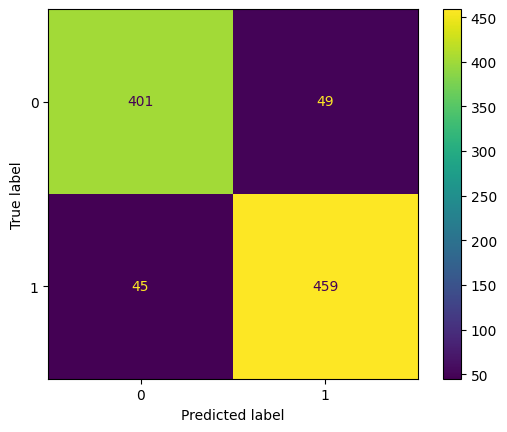

In [12]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

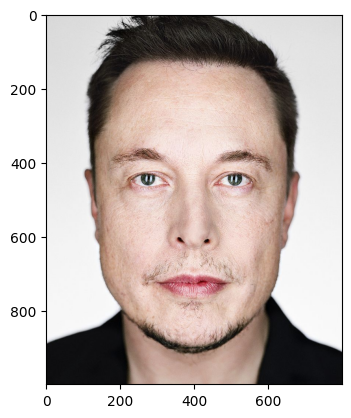

In [14]:
import matplotlib.pyplot as plt

newimage = imread('/content/drive/MyDrive/catdog_predict/elon_predict.jpg')
plt.imshow(newimage)

In [15]:
img = resize(newimage,(150,150,3)).flatten()
# img.shape

In [16]:
img = img.reshape(1,-1)
# img.shape

In [18]:
y_new = clasifier.predict(img)
if y_new  == 0:
  print('with mask')
else:
  print('without mask')

without mask
